### **Import Libraries**

In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

### **Getting Know About The Dataset**

In [9]:
exercise_df = pd.read_csv('/kaggle/input/fmendesdat263xdemos/exercise.csv')
calories_df= pd.read_csv('/kaggle/input/fmendesdat263xdemos/calories.csv')

In [10]:
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
exercise_df.shape

(15000, 8)

In [12]:
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [13]:
calories_df.shape

(15000, 2)

In [14]:
# Merge the data
df_new= pd.merge(exercise_df, calories_df, on='User_ID')

#### **Checking User ID's In Both Tables**

In [8]:
df_new.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
df_new.drop(['User_ID'],axis=1,inplace=True)

In [10]:
df_new.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
df_new.shape

(15000, 8)

In [12]:
df_new.dtypes

Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [13]:
df_new.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [14]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


## **Data Distribution**

In [18]:
df_new['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label = LabelEncoder()

df_new['Gender'] = label.fit_transform(df_new['Gender'])
df_new.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,0,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,0,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,1,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,1,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,0,26,146.0,51.0,16.0,90.0,40.2,72.0


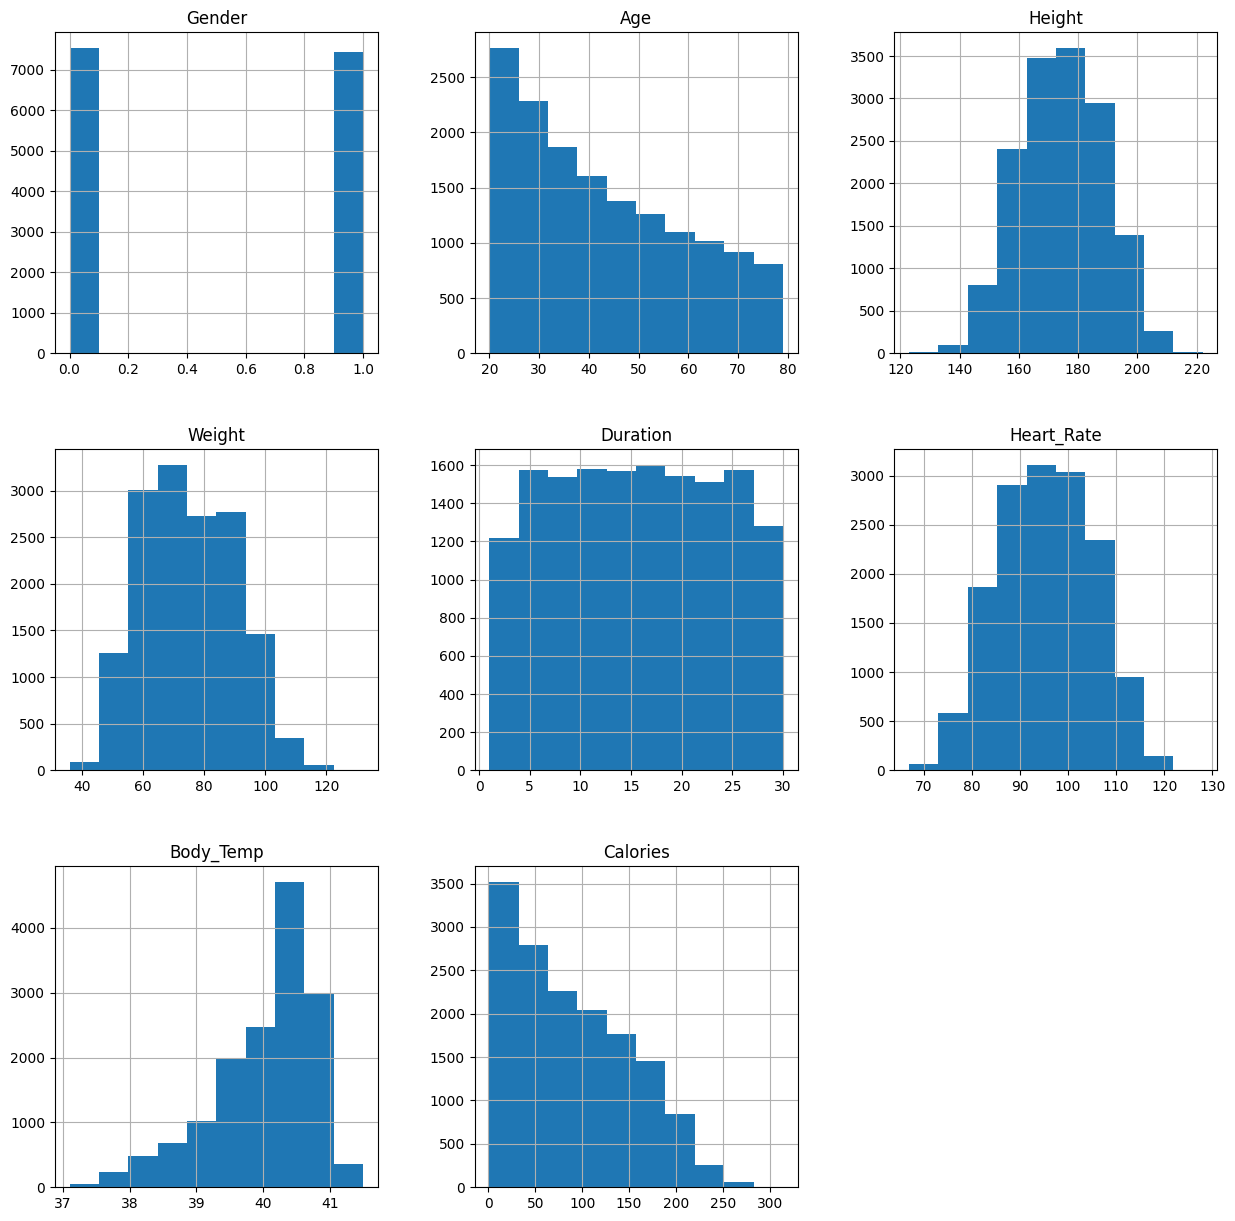

In [16]:
df_new.hist(figsize=(15,15))
plt.show()

/tmp/ipykernel_33/51788417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Calories'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Calories', ylabel='Density'>

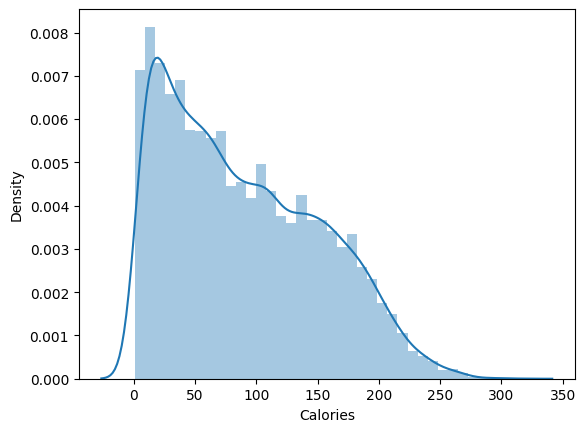

In [22]:
sns.distplot(df_new['Calories'])

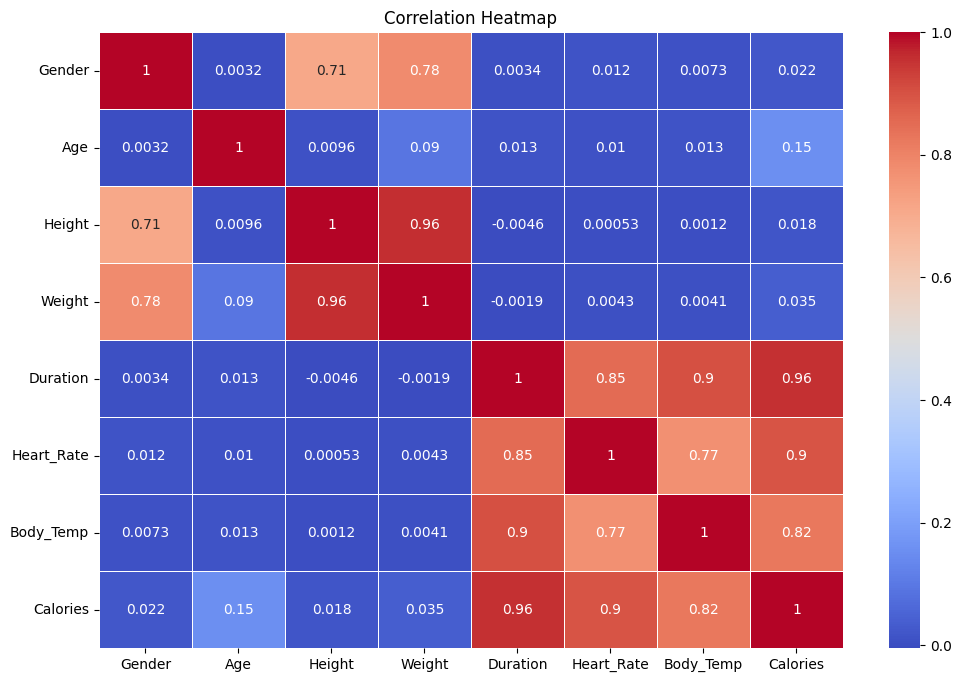

In [23]:
# Data exploration and visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Gender vs Height**

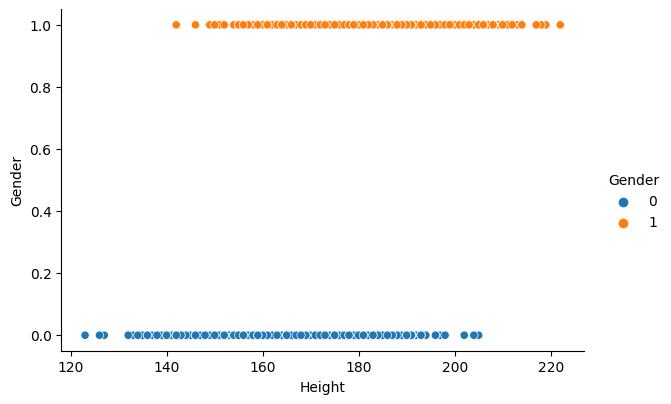

In [24]:
pl=sns.relplot(x='Height',y='Gender',data=df_new,hue='Gender')
pl.fig.set_size_inches(7,4)
plt.show()

### **Gender vs weight**

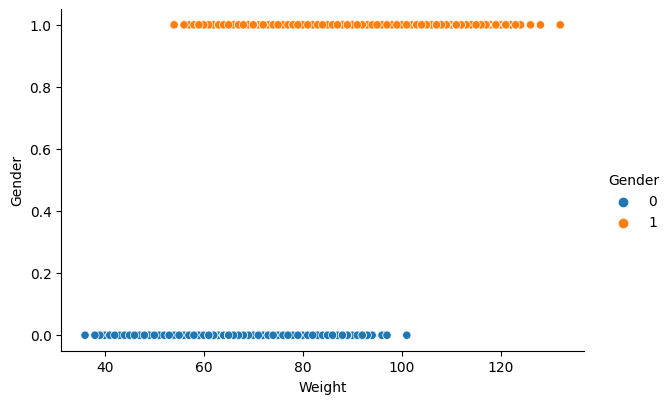

In [25]:
pl=sns.relplot(x='Weight',y='Gender',data=df_new,hue='Gender')
pl.fig.set_size_inches(7,4)
plt.show()

### **Height vs Calories vs Gender**

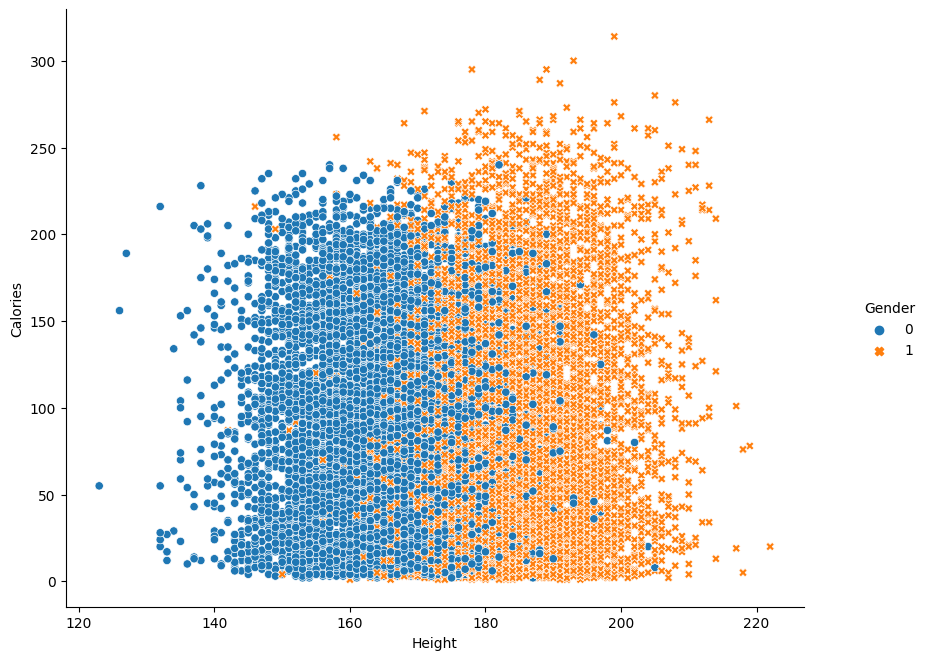

In [26]:
pl=sns.relplot(x='Height',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Weight vs Calories vs Gender**

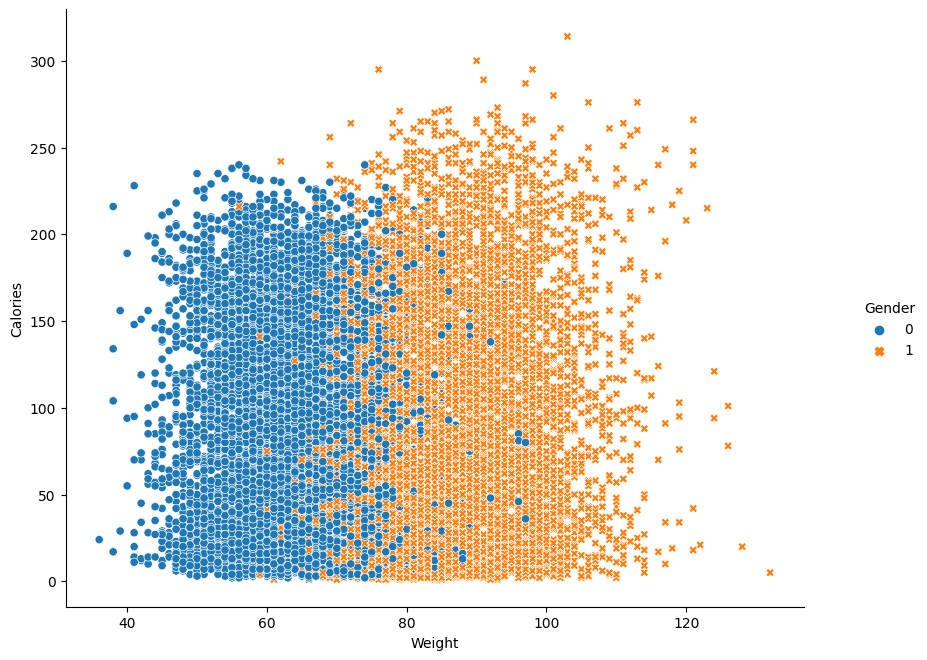

In [27]:
pl=sns.relplot(x='Weight',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Age vs Calories vs Gender**

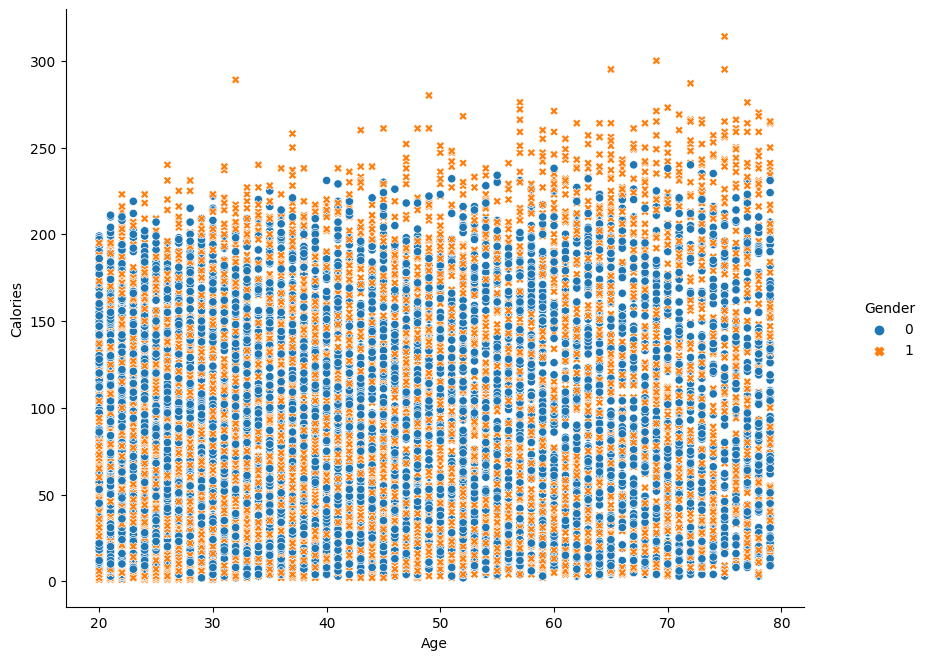

In [28]:
pl=sns.relplot(x='Age',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Duration vs Calories vs Gender**

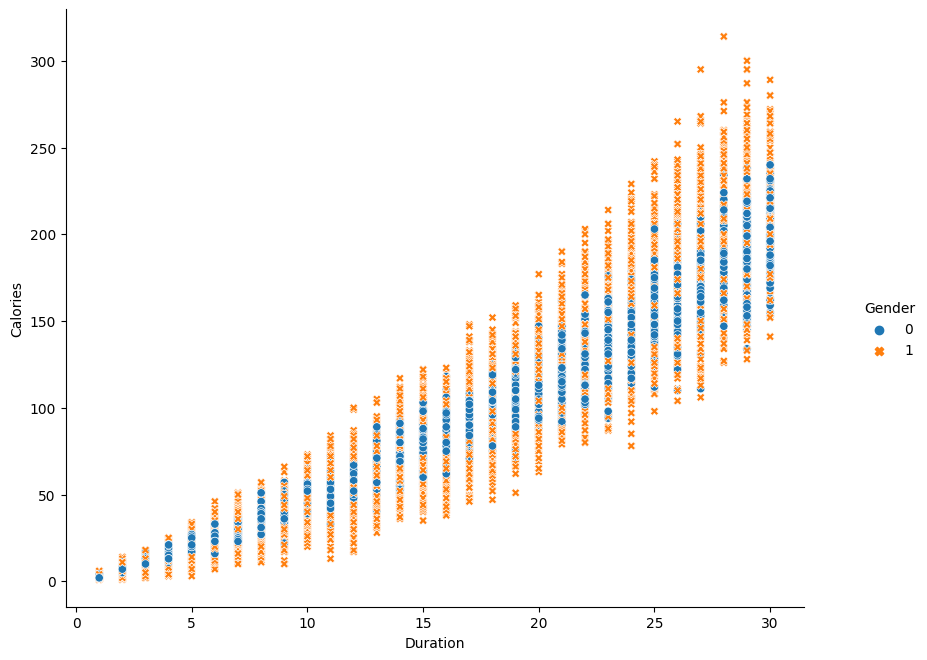

In [29]:
pl=sns.relplot(x='Duration',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Heart Rate vs Calories vs Gender**

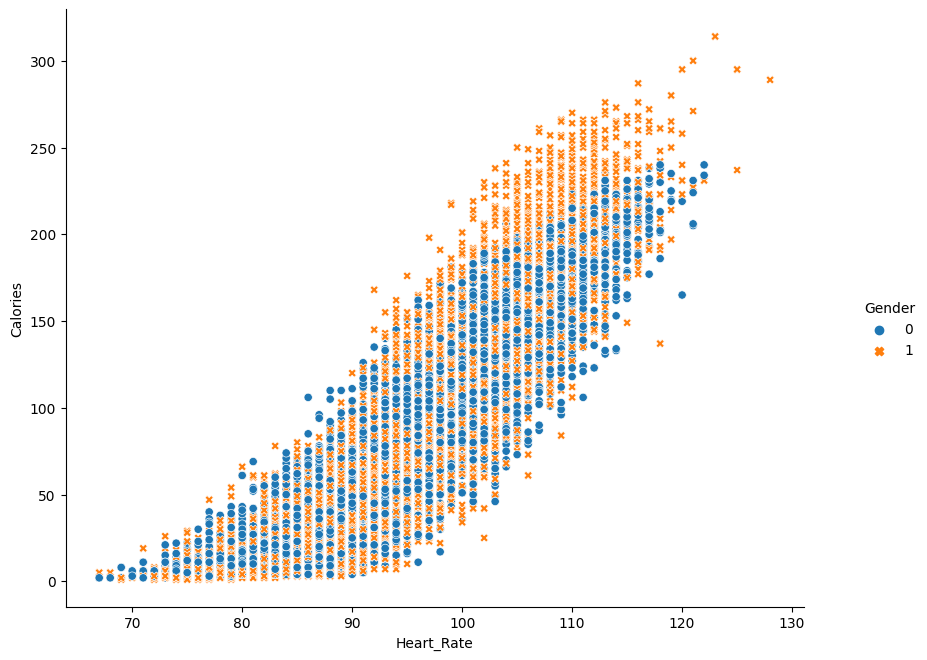

In [30]:
pl=sns.relplot(x='Heart_Rate',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

### **Body Temperature vs Calories vs Gender**

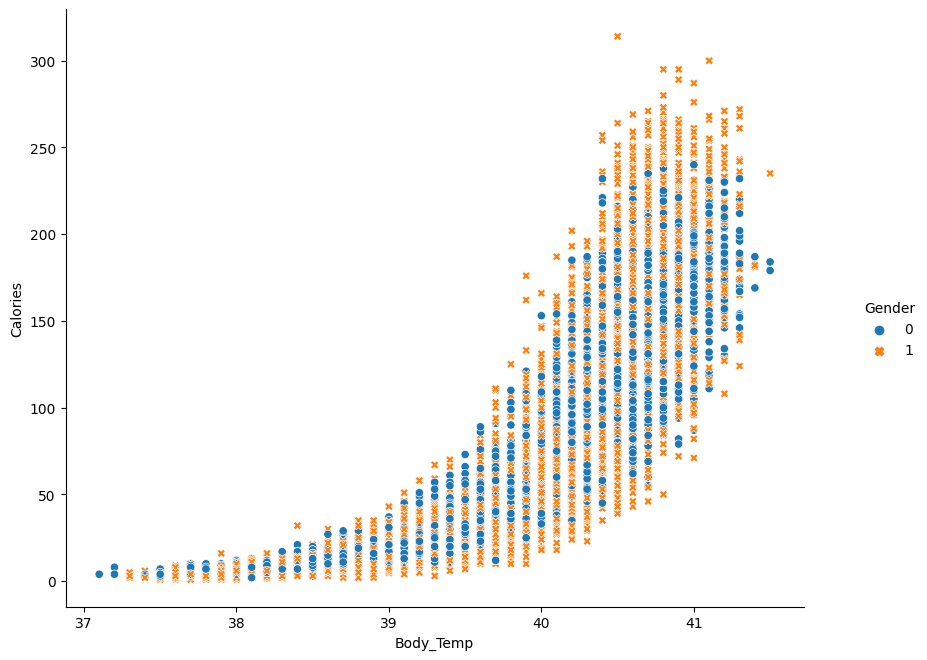

In [31]:
pl=sns.relplot(x='Body_Temp',y='Calories',data=df_new,hue='Gender',style='Gender')
pl.fig.set_size_inches(10,7)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

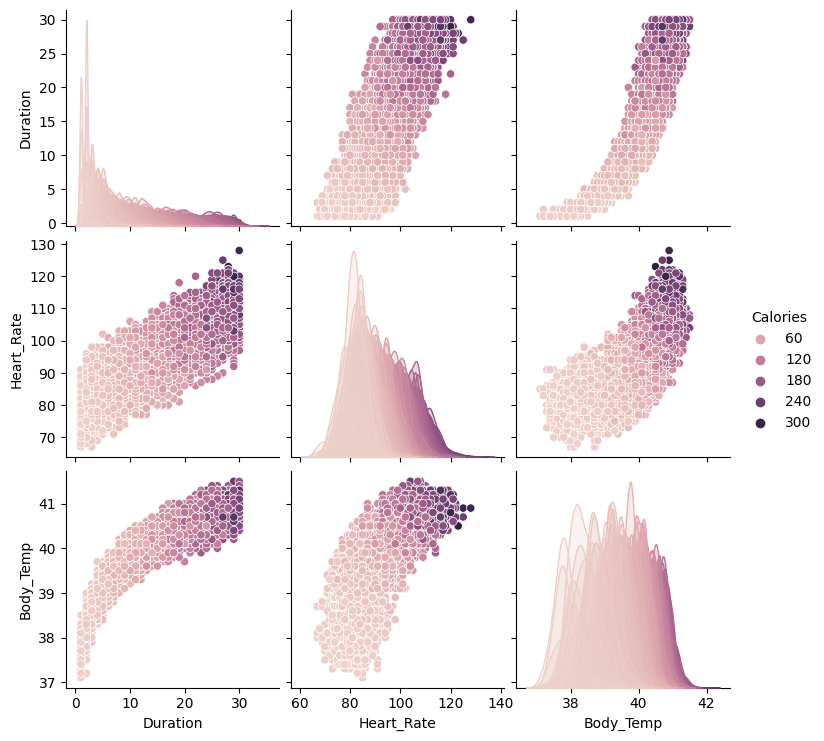

In [32]:
sns.pairplot(df_new[['Duration','Heart_Rate', 'Body_Temp','Calories']],hue="Calories")

### **Data Pre Processing**

In [16]:
y = df_new['Calories']
x = df_new.drop(['Calories'],axis=1)

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb

In [65]:
# Additional models
additional_models = {
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=50, learning_rate=1),
    "Ridge Regression": Ridge(alpha=0.5),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": xgb.XGBRegressor()
}

# Combine models
all_models = { **additional_models}

AdaBoost Regressor Testing Score: 0.961262024647107
Mean Absolute Error: 9.982475546791482
Mean Squared Error: 156.3383907783544
Root Mean Squared Error: 12.503535131248059
R-squared Score: 0.961262024647107


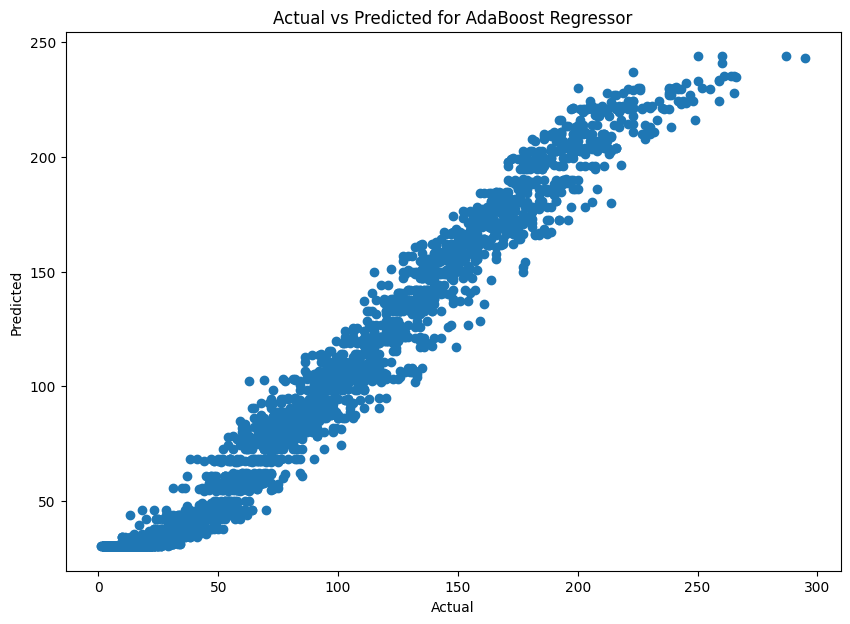

Ridge Regression Testing Score: 0.9672751432732318
Mean Absolute Error: 8.443550555919662
Mean Squared Error: 132.07069787484537
Root Mean Squared Error: 11.49220161130344
R-squared Score: 0.9672751432732318


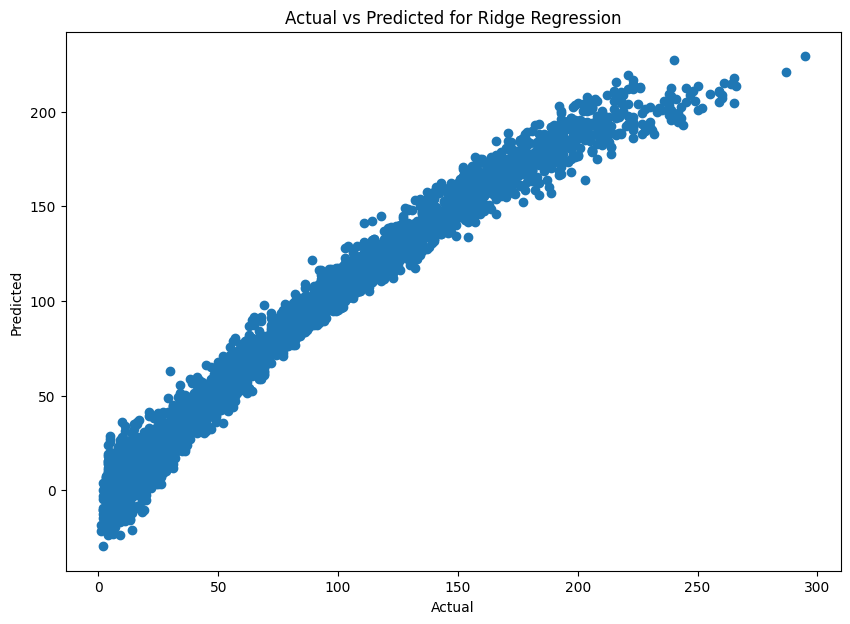

Lasso Regression Testing Score: 0.967019084457489
Mean Absolute Error: 8.451447731215827
Mean Squared Error: 133.1040978611167
Root Mean Squared Error: 11.537074926562482
R-squared Score: 0.967019084457489


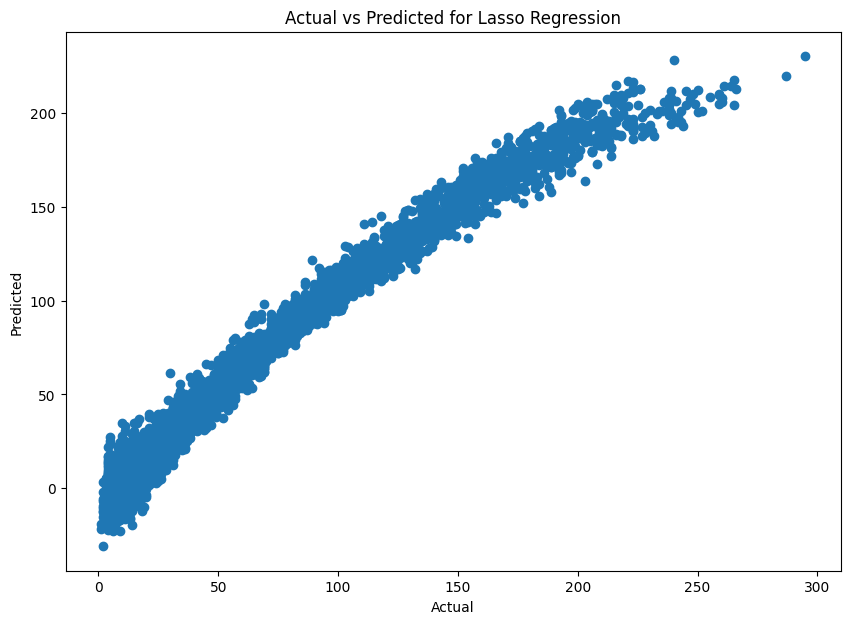

Decision Tree Regressor Testing Score: 0.9923520990847308
Mean Absolute Error: 3.5893333333333333
Mean Squared Error: 30.865333333333332
Root Mean Squared Error: 5.555657776837351
R-squared Score: 0.9923520990847308


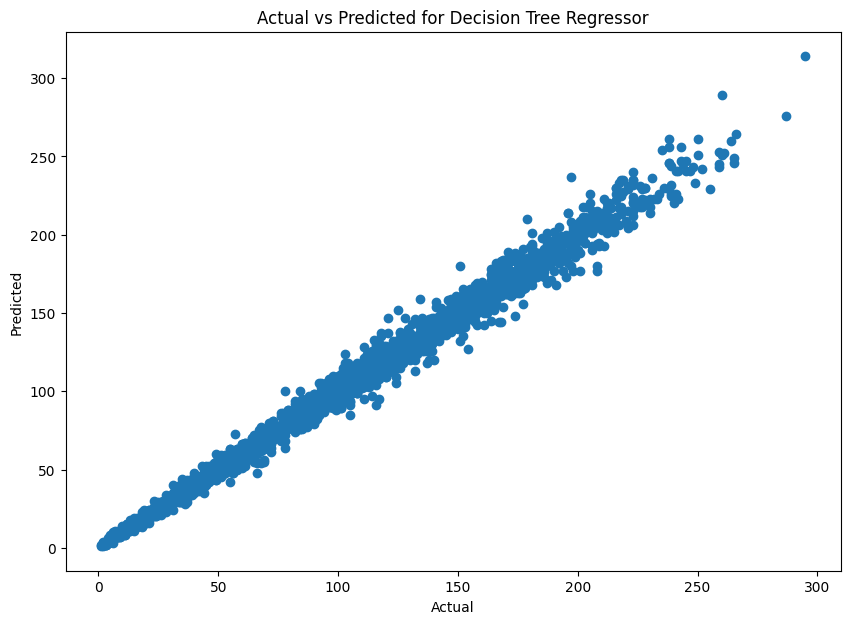

K-Nearest Neighbors Regressor Testing Score: 0.9892790860042346
Mean Absolute Error: 4.878066666666667
Mean Squared Error: 43.26737333333334
Root Mean Squared Error: 6.577793956436561
R-squared Score: 0.9892790860042346


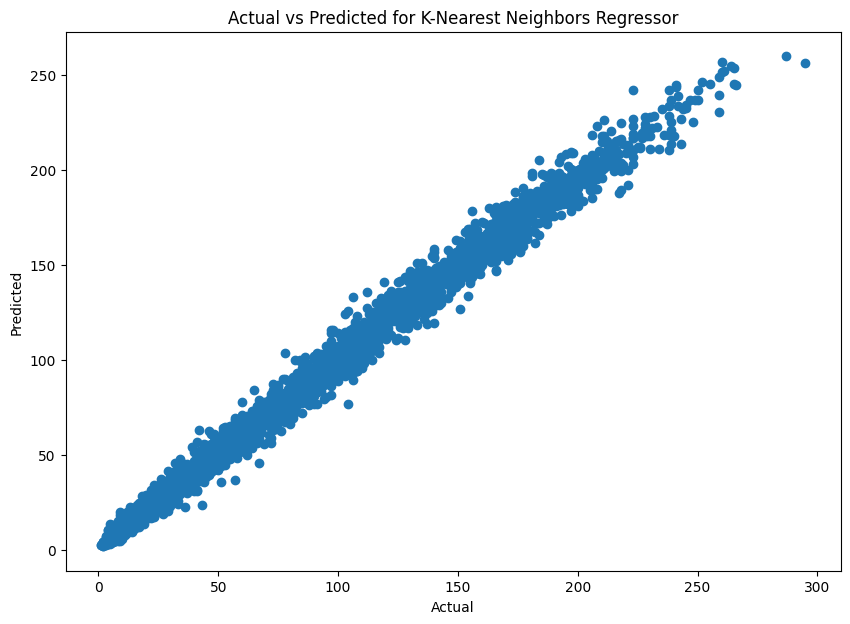

Random Forest Regressor Testing Score: 0.9980391777479638
Mean Absolute Error: 1.8004866666666666
Mean Squared Error: 7.913469733333334
Root Mean Squared Error: 2.8130890020284345
R-squared Score: 0.9980391777479638


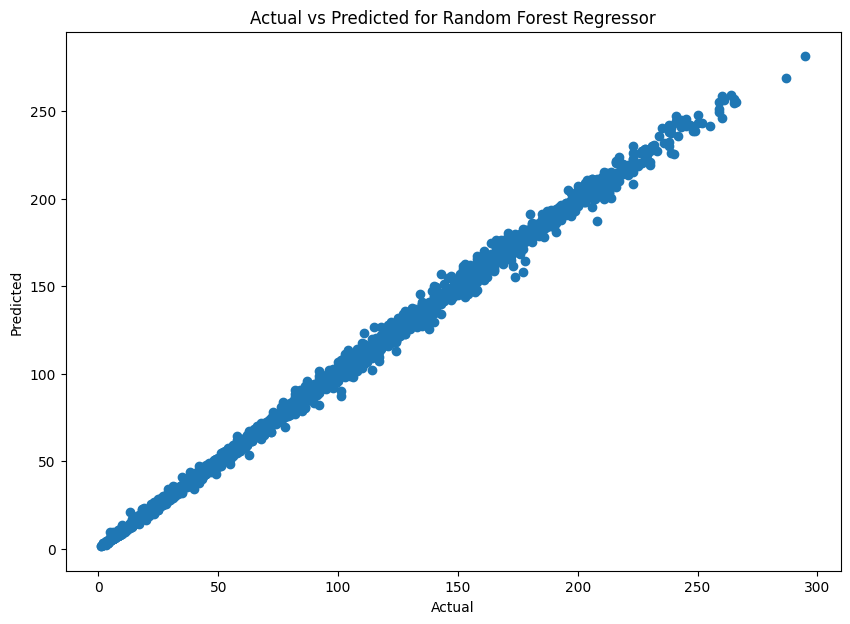

XGBoost Regressor Testing Score: 0.9987901041693489
Mean Absolute Error: 1.5374335261185963
Mean Squared Error: 4.882887281803026
Root Mean Squared Error: 2.2097256123335822
R-squared Score: 0.9987901041693489


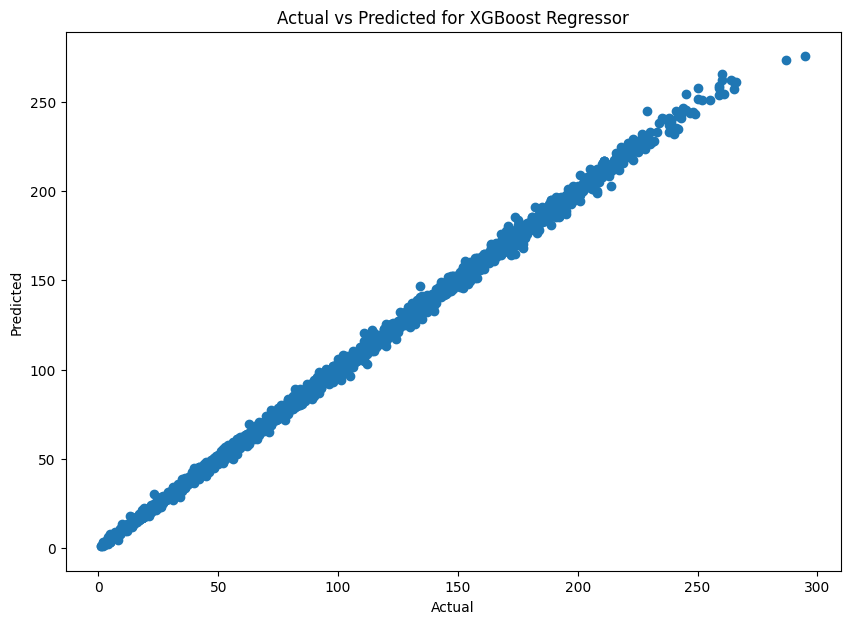

In [70]:
model_results = []

best_models = [None, None, None]
best_scores = [-np.inf, -np.inf, -np.inf]

# Train and evaluate all models
for name, model in all_models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    
    # Predictions
    y_predict = model.predict(x_test)
    
    # Error Calculation
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predict)
    
    # Add results to list
    model_results.append({
        'Model': name,
        'Testing Score': score,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared Score': r2
    })
    
    # Print model results
    print(f"{name} Testing Score: {score}")
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('R-squared Score:', r2)
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 7))
    plt.scatter(y_test, y_predict)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {name}')
    plt.show()
    
    # Update best models
    for i in range(len(best_scores)):
        if score > best_scores[i]:
            best_scores[i] = score
            best_models[i] = (name, model)
 

In [71]:
import numpy as np

# Finalize the best model among the top 3 based on error metrics
best_model = None
best_error = np.inf

if best_models:
    for name, model in best_models:
        y_predict = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_predict)
        mse = mean_squared_error(y_test, y_predict)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_predict)

        # Calculate an error metric (e.g., sum of absolute error, or any other combination)
        error_metric = mae + mse + rmse

        if error_metric < best_error:
            best_error = error_metric
            best_model = (name, model)

    if best_model:
        print("Best Model:")
        print("Model Name:", best_model[0])
        print("Error Metric:", best_error)
        print("R-squared Score:", r2_score(y_test, best_model[1].predict(x_test)))
else:
    print("No best models found.")


Best Model:
Model Name: XGBoost Regressor
Error Metric: 8.630046420255203
R-squared Score: 0.9987901041693489


In [72]:

# Save the best model as a Pickle file
with open('Caloriesmodel.pkl', 'wb') as f:
    pickle.dump(best_model, f)